In [83]:
%load_ext autoreload
%autoreload
import torch
import torchvision
from opencv_transforms import ToTensor
from torch.utils.data import DataLoader
import cv2
import pathlib
import matplotlib.pyplot as plt
from utils import ABImageDataset, ResizeTwoIMG, RandHFlipTwoIMG
from utils import RandomCropTwoIMG, ComposeTwoIMG,ToTensorTwoIMG

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
transform = ComposeTwoIMG([
    ResizeTwoIMG(size=286), RandomCropTwoIMG(size=256),
    RandHFlipTwoIMG(p=0.5), ToTensorTwoIMG()
])

data = ABImageDataset(root=pathlib.Path("../data/pix2pix/facades/train"),
               transform=transform, normalizer=None)

dataloader = DataLoader(data, batch_size=4, num_workers=2, shuffle=False)

In [87]:
hoge = iter(dataloader)
a = next(hoge)

tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


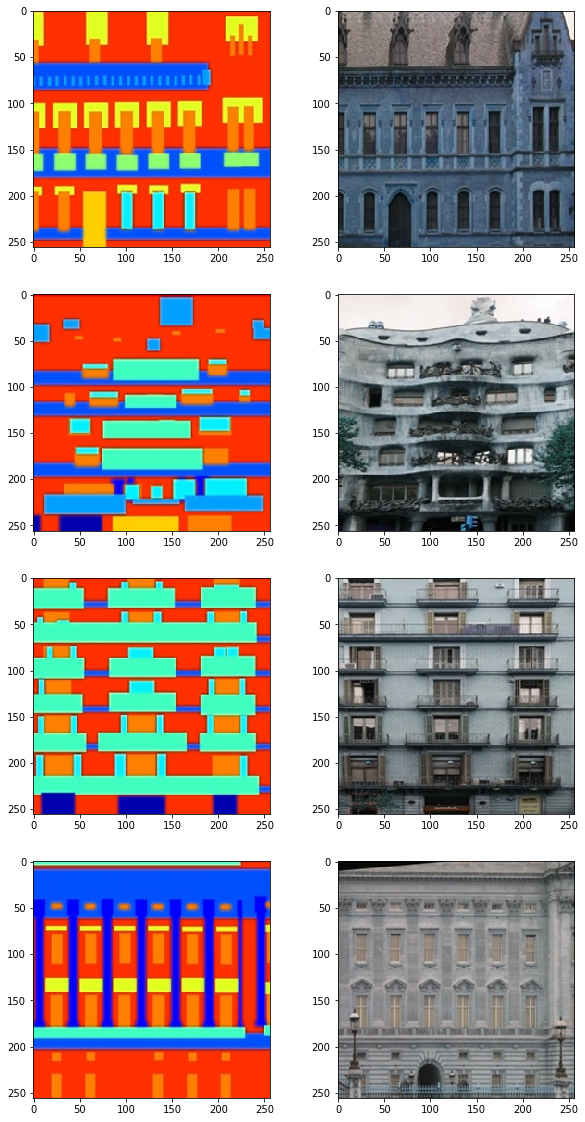

In [107]:
fig, ax = plt.subplots(4, 2, figsize=(10, 20))

inputs_A, outputs_B = a
for input_A, output_B, i in zip(inputs_A, outputs_B, range(4)):
    ax[i, 0].imshow(cv2.cvtColor(input_A.numpy().transpose(1, 2, 0), cv2.COLOR_BGR2RGB))
    ax[i, 1].imshow(cv2.cvtColor(output_B.numpy().transpose(1, 2, 0), cv2.COLOR_BGR2RGB))
    print(outputs_B.min(), outputs_B.max())